#### Мажник Павел, 792

### ДЗ 1. Свойства оценок.
#### Задача 4. 
Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпирической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различных значений $n$). Для всех $n \leq N$
посчитайте точное значение $D_n = \sup_{x\in\mathbb{R}}
|\hat{F}_n(x) - F(x)|$ и постройте график зависимости статистик
$D_n$ и $\sqrt{n}D_n$ от $n.$

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
N = 10 ** 4

# Сгенерируем выборку:
sample = norm.rvs(size=N)
print("Sample:", sample)

Sample: [ 0.8025022  -0.75327256  0.07128737 ...  1.43940988 -0.72736361
  0.66129437]


Для всех $n\leq N$ посчитаем эмпирическую
функцию распределения:

In [5]:
ecdf = [ECDF(sample[:i]) for i in range(1, N + 1)]

Построим графики эмпирической и истинной функций распределения для различных $n$:

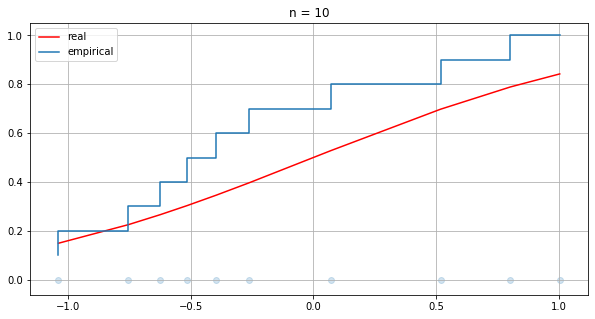

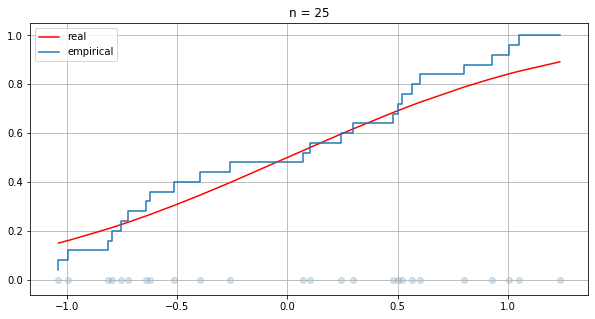

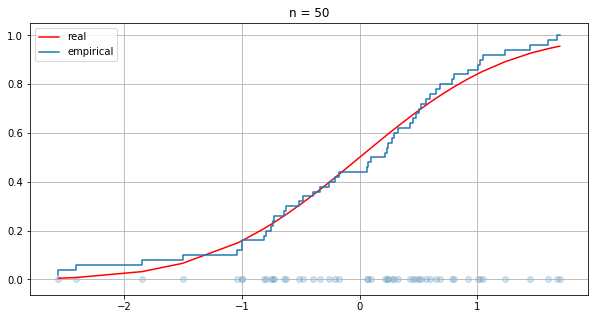

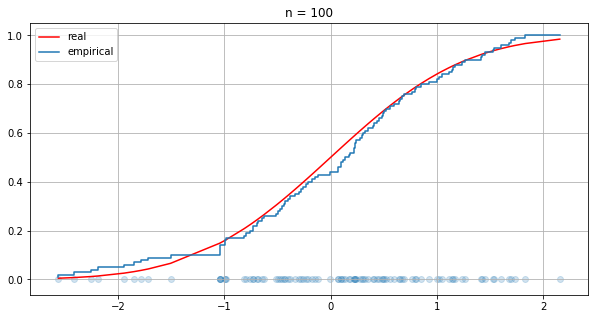

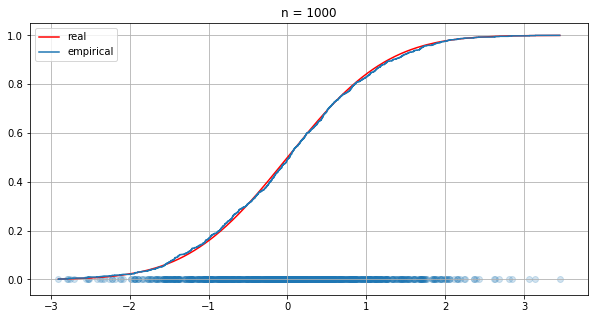

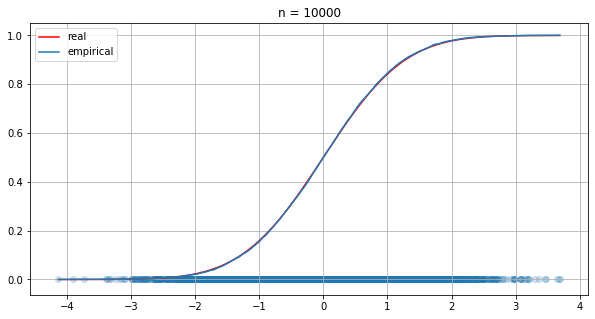

In [6]:
ns = [10, 25, 50, 100, 1000, N]
for i in ns:
    d = ecdf[i - 1]
    plt.figure(figsize=(10, 5))
    x = np.linspace(sample.min(), sample.max(), N)
    plt.plot(d.x, norm.cdf(d.x), "r", label="real")
    plt.step(d.x, d.y, label="empirical")
    plt.scatter(sample[:i], np.zeros(i), alpha=0.2)
    plt.title(f'n = {i}')
    plt.legend()
    plt.grid()
    plt.show()

Для всех $n \leq N$
посчитаем точное значение $D_n = \sup_{x\in\mathbb{R}}
|\hat{F}_n(x) - F(x)|$ и построем график зависимости статистик
$D_n$ и $\sqrt{n}D_n$ от $n.$

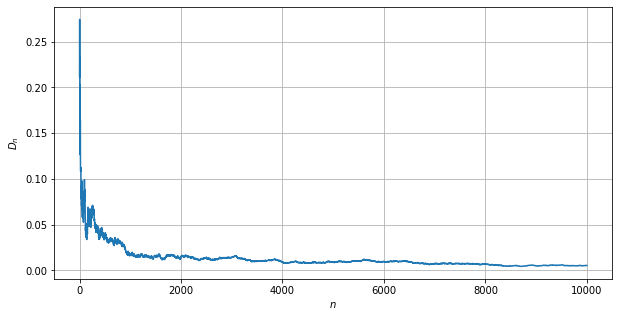

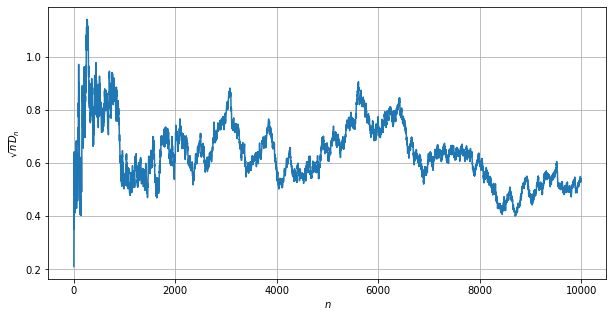

In [20]:
D = []
sqrt_n_D = []
for n in range (N):
    diff = np.max(np.abs(ecdf[n].y - norm.cdf(ecdf[n].x)))
    D.append(diff)
    sqrt_n_D.append(diff * (n + 1) ** (1/2))

plt.figure(figsize=(10, 5))
plt.plot(range(1, N + 1), D)
plt.xlabel(r'$n$')
plt.ylabel(r'$D_n$')
plt.grid()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(range(1, N + 1), sqrt_n_D)
plt.xlabel(r'$n$')
plt.ylabel(r'$\sqrt{n} D_n$')
plt.grid()
plt.show()

Из графиков видно, что $D_n$ стремится к нулю с ростом $n$, что соответствует теореме Гливенко-Кантелли.  
Также $\sqrt{n} D_n$ колеблется возле числа 0.6, откуда можно сделать вывод, что скорость сходимости $D_n$ пропорциональна $\frac{1}{\sqrt{n}}$. Проверим это, нанеся $\frac{1}{\sqrt{n}}$ на график зависимости статистики
$D_n$ от $n:$

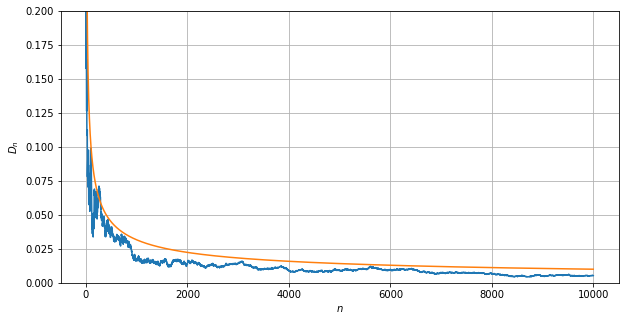

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, N + 1), D)
plt.plot(range(1, N + 1), 1/np.sqrt(range(1, N + 1)), label = r'$1/\sqrt{n}$')
plt.ylim(0, 0.2)
plt.xlabel(r'$n$')
plt.ylabel(r'$D_n$')
plt.grid()
plt.show()

Получили, что скорость сходимости статистики $D_n$ действительно пропорциональна $\frac{1}{\sqrt{n}}$, что соответствует теореме Колмогорова:  
$\sqrt{n} \sup_{x\in\mathbb{R}}
|\hat{F}_n(x) - F(x)| \to K$ (по распределению) при $n \to \infty$,
где K — случайная величина, имеющая распределение Колмогорова.